# 

In [350]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

## Facebook

In [351]:
fb = pd.read_csv("./csv/facebook.csv", index_col="Date")
fb["PriceYesterday"] = fb["Close"].shift(1)
fb["PriceTomorrow"] = fb["Close"].shift(-1)
fb["PriceDifference"] = fb["PriceTomorrow"] - fb["Close"]
fb["Return"] = fb["PriceDifference"] / fb["Close"]
fb["Direction"] = [1 if fb.loc[ei, "PriceDifference"] > 0 else -1 for ei in fb.index]
fb["Average3"] = (fb["Close"] + fb["Close"].shift(1) + fb["Close"].shift(2)) / 3
fb["MA10"] = fb["Close"].rolling(10).mean() # fast signal
fb["MA40"] = fb["Close"].rolling(40).mean() # fast signal
fb["MA50"] = fb["Close"].rolling(50).mean() # slow signal
fb["MA200"] = fb["Close"].rolling(200).mean() # slow signal
fb["Shares"] = [1 if fb.loc[ei, "MA10"] > fb.loc[ei, "MA50"] else 0 for ei in fb.index]
fb["Profit"] = [fb.loc[ei, "PriceTomorrow"] - fb.loc[ei, "Close"] if fb.loc[ei,"Shares"] == 1 else 0 for ei in fb.index]
fb["Wealth"] = fb["Profit"].cumsum()
fb

,Open,High,Low,Close,Adj Close,Volume,PriceYesterday,PriceTomorrow,PriceDifference,Return,Direction,Average3,MA10,MA40,MA50,MA200,Shares,Profit,Wealth
Date,,,,,,,,,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,20.129999,0.080000,0.003990,1,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,19.790001,-0.339998,-0.016890,-1,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,19.190001,-0.600000,-0.030318,-1,19.990000,NaN,NaN,NaN,NaN,0,0.000000,0.000000
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,19.139999,-0.050002,-0.002606,-1,19.703334,NaN,NaN,NaN,NaN,0,0.000000,0.000000
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,19.860001,0.720002,0.037618,1,19.373334,NaN,NaN,NaN,NaN,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,246.850006,245.800003,3.080002,0.012690,1,244.300003,235.692003,209.863250,210.030001,173.15295,1,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,242.720001,240.500000,-5.300003,-0.021562,-1,245.123337,237.800003,211.066251,210.713801,173.88580,1,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,245.800003,233.520004,-6.979996,-0.029023,-1,243.006668,239.406003,212.412250,211.296601,174.59185,1,-6.979996,165.540012


In [352]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,PriceYesterday,PriceTomorrow,PriceDifference,Return,Direction,Average3,MA10,MA40,MA50,MA200,Shares,Profit,Wealth
Date,,,,,,,,,,,,,,,,,,,
2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,NaN,20.129999,0.080000,0.003990,1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,20.049999,19.790001,-0.339998,-0.016890,-1,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,20.129999,19.190001,-0.600000,-0.030318,-1,19.990000,NaN,NaN,NaN,NaN,0,0.0,0.0
2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,19.790001,19.139999,-0.050002,-0.002606,-1,19.703334,NaN,NaN,NaN,NaN,0,0.0,0.0
2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,19.190001,19.860001,0.720002,0.037618,1,19.373334,NaN,NaN,NaN,NaN,0,0.0,0.0


In [353]:
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceYesterday,PriceTomorrow,PriceDifference,Return,Direction,Average3,MA10,MA40,MA50,MA200,Shares,Profit,Wealth
Date,,,,,,,,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,246.850006,245.800003,3.080002,0.012690,1,244.300003,235.692003,209.863250,210.030001,173.15295,1,3.080002,177.820011
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,242.720001,240.500000,-5.300003,-0.021562,-1,245.123337,237.800003,211.066251,210.713801,173.88580,1,-5.300003,172.520008
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,245.800003,233.520004,-6.979996,-0.029023,-1,243.006668,239.406003,212.412250,211.296601,174.59185,1,-6.979996,165.540012
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,240.500000,213.699997,-19.820007,-0.084875,-1,239.940002,239.747003,213.556750,211.685401,175.26105,1,-19.820007,145.720005
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,233.520004,NaN,NaN,NaN,-1,229.240000,237.748003,214.167750,211.638401,175.82325,1,NaN,NaN


In [354]:
fb.shape

(780, 19)

In [355]:
fb.describe()

,Open,High,Low,Close,Adj Close,Volume,PriceYesterday,PriceTomorrow,PriceDifference,Return,Direction,Average3,MA10,MA40,MA50,MA200,Shares,Profit,Wealth
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02,779.000000,779.000000,779.000000,779.000000,780.000000,778.000000,771.000000,741.000000,731.000000,581.000000,780.000000,779.000000,779.000000
mean,80.212705,81.285654,79.022397,80.264897,79.914215,1.204453e+07,80.093607,80.342195,0.248588,0.003362,0.117949,80.162258,79.713073,78.049364,77.585723,70.847097,0.728205,0.187060,48.188563
std,64.226121,65.048907,63.190963,64.198375,64.327846,8.221848e+06,64.061017,64.203290,2.583929,0.025850,0.993657,64.024378,63.212943,60.291958,59.533420,45.847724,0.445170,2.446227,58.074992
min,19.250000,19.500000,18.940001,19.139999,18.576082,1.311200e+06,19.139999,19.139999,-19.820007,-0.092723,-1.000000,19.373334,19.657000,20.369000,20.689600,21.772350,0.000000,-19.820007,-8.890000
25%,25.525000,26.085000,24.845000,25.475000,25.134512,7.215200e+06,25.460000,25.610000,-0.379999,-0.008059,-1.000000,25.717500,26.494500,27.776000,28.112900,29.496450,0.000000,-0.190002,0.000000
50%,53.379999,54.034999,52.930000,53.420000,53.035403,9.728700e+06,53.320000,53.520000,0.090000,0.002504,1.000000,53.611667,53.971000,53.441000,53.693000,54.703000,1.000000,0.000000,21.929999
75%,113.322502,115.779999,110.297499,113.702501,113.261238,1.408885e+07,112.695000,113.785000,0.760002,0.013861,1.000000,112.529167,112.257000,108.506750,107.665500,105.294900,1.000000,0.535002,82.194999
max,245.770004,249.270004,244.449997,246.850006,246.850006,9.232320e+07,246.850006,246.850006,20.200004,0.298067,1.000000,245.123337,239.747003,214.167750,211.685401,175.823250,1.000000,20.200004,178.990010


In [356]:
fb_2015 = fb.loc['2015-01-01':'2015-12-31', 'Close']
fb_2015

Date
2015-01-02    20.129999
2015-01-05    19.790001
2015-01-06    19.190001
2015-01-07    19.139999
2015-01-08    19.860001
                ...    
2015-12-24    33.169998
2015-12-28    33.139999
2015-12-29    33.680000
2015-12-30    33.389999
2015-12-31    32.959999
Name: Close, Length: 252, dtype: float64

In [357]:
fb_2015.loc['2015-03-16']

22.969999

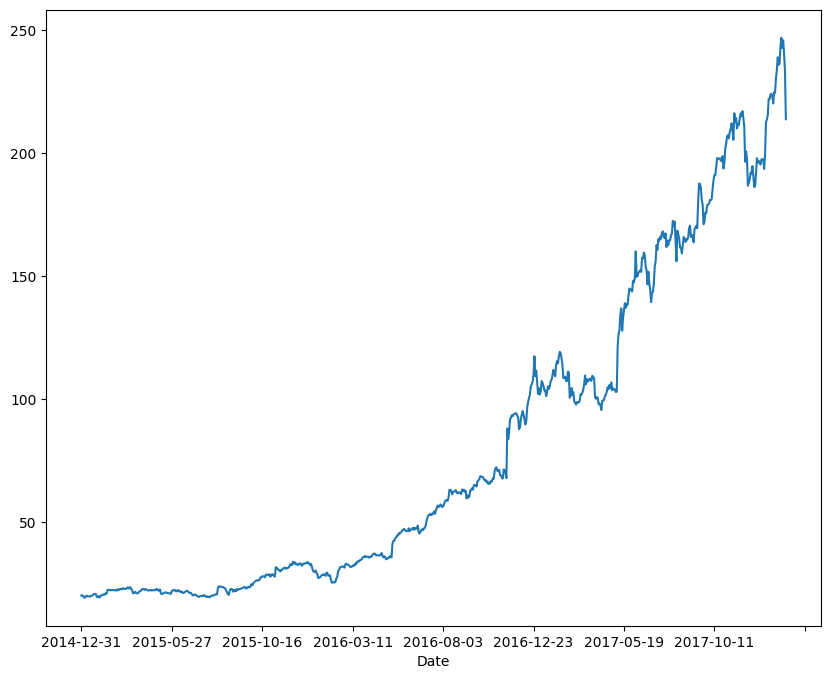

In [358]:
plt.figure(figsize=(10, 8))
fb['Close'].plot()
plt.show()

<Axes: xlabel='Date'>

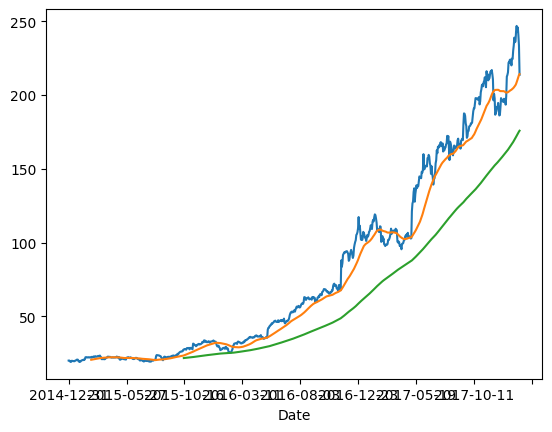

In [359]:
fb["Close"].plot()
fb["MA40"].plot()
fb["MA200"].plot()

<Axes: xlabel='Date'>

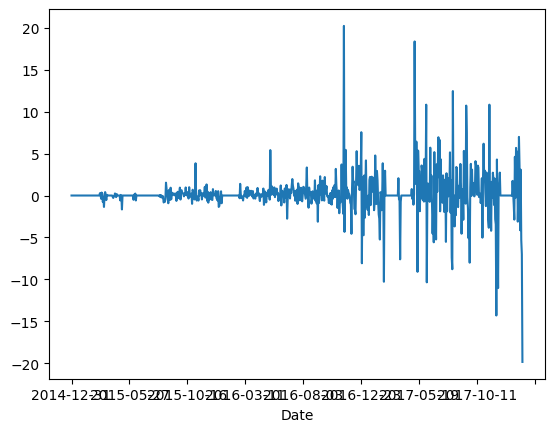

In [360]:
fb["Profit"].plot()

In [361]:
fb[["Open", "Low"]]

,Open,Low
Date,,
2014-12-31,20.400000,19.990000
2015-01-02,20.129999,19.809999
2015-01-05,20.129999,19.700001
2015-01-06,19.820000,19.170000
2015-01-07,19.330000,19.080000
...,...,...
2018-01-30,241.110001,238.410004
2018-01-31,245.770004,244.449997
2018-02-01,238.520004,238.059998


## Microsoft

In [362]:
ms = pd.read_csv("./csv/microsoft.csv")
ms

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100
...,...,...,...,...,...,...,...
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800


In [363]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


In [364]:
ms.shape

(780, 7)

In [365]:
ms.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,58.912308,59.372308,58.465000,58.945397,56.931553,2.978900e+07
std,12.852040,12.868060,12.802831,12.830350,13.670080,1.522319e+07
min,40.340000,40.740002,39.720001,40.290001,37.267815,7.425600e+06
25%,47.894998,48.295000,47.535001,47.974998,44.792073,2.096685e+07
50%,56.150002,56.640001,55.700001,56.209999,53.775458,2.623125e+07
75%,67.892500,68.174997,67.447500,67.740000,66.565508,3.408020e+07
max,95.139999,96.070000,93.720001,95.010002,94.565781,1.691640e+08
